In [58]:
!pip install pip

In [59]:
!pip install matplotlib 

In [60]:
!pip install numpy

In [61]:
import requests
#get data from a download link
download_url="https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"
response = requests.get(download_url)
response.raise_for_status() #check that the request was successful

#save the file nba_all_elo.csv in your current working directory
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("download ready")

download ready


In [62]:
!pip install pandas

In [63]:
#importing pandas in Python with the pd alias
import pandas as pd
#read in the dataset and store it as a DataFrame object in the variable nba
#when you copy the file path, if you get the FileNotFoundError: [Errno 2]
#then flip the backslash to a forward slash, and voila, it works!
nba = pd.read_csv("C:/Users/X/Documents/Study/Business Intelligence/labs/lab 1/nba_all_elo.csv")
#check nba's type, it should be a DataFrame
type(nba)

pandas.core.frame.DataFrame

**Question No.1 (report your answer): Display the first 3 rows of your dataset.Remember that the
default nba.head() shows the first 5 rows**

**Answer No.1**

In [88]:
df = pd.DataFrame(nba) #here we are converting the nba dataset into a dataframe

In [89]:
df1 = df.head(3) #here we are storing the dataframe into an object while tweaking the head function to display only first three rows

In [90]:
df1 #here we are priting/displaying the object

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN


** **

In [91]:
#you can provide other data types using the include parameter
import numpy as np
nba.describe(include=object) #to avoid DeprecationWarning, here we are simnply replacing 'np.object' with 'object'

,game_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,12426,104,53,104,53,3,2,231
top,194611010TRH,4/13/2011,BOS,Lakers,BOS,Lakers,H,L,at New York NY
freq,2,30,5997,6024,5997,6024,63138,63157,440


** **

**Question.2 (report your answer): Take a look at the team_id and fran_id (franchise) columns;
what observations can you make at this point (i.e. do you see anything strange here)? Write
your initial observation, then carry on with section 3.3 to be able to answer it by exploring your
dataset.**

**Answer No.2**

Both the columns show a variety of information which really does not make any sense, meaning that the information is present but we can't be sure if it means something or not (there is no context here). It's just a piece of dataframe that can't be used to generate meaningful information

** **

**Question.3 (report your answer): Find out how many wins and losses the Minneapolis
Lakers had and how many points they scored during the matches in the dataset.**

**Answer No.3**

In [92]:
nba.loc[nba["team_id"] == "MNL", "game_result"].count() #here we are retrieving the total no. of matches played by MNL using the loc function

946

In [93]:
nba.loc[nba["team_id"] == "MNL", "game_result"].max() #here we are retrieving the highest frequency, whether Wins or Losses using the loc function

'W'

In [94]:
nba.loc[nba["team_id"] == "MNL", "game_result"].min() #here we are retrieving the lowest frequency, whether Wins or Losses using the loc function

'L'

In [95]:
nba.loc[nba["team_id"] == "MNL", "game_result"].agg(("min", "max"))#here we are retrieving both together, whether Wins or Losses using the loc function

min    L
max    W
Name: game_result, dtype: object

In [96]:
nba[(nba["team_id"]=="MNL")].groupby(["game_result"])["game_id"].count() #here we are retrieving game results of 'MNL'using the nba dataset and grouping game_result with game_id with a count function to retrieve the wins and losses of MNL team

game_result
L    422
W    524
Name: game_id, dtype: int64

In [97]:
nba.loc[nba["team_id"]=="MNL", "pts"].sum() #here we have retrieved the total points scoted by MNL in all games in the nba dataset

88229

** **

**Question.4 (report your answer): Now you understand why the Boston Celtics team "BOS" played the most games in the dataset, find out how many points the Boston Celtics have scored during all matches contained in this dataset.**

**Answer No.4**

In [98]:
nba.loc[nba["team_id"]=="BOS", "pts"].sum() #here we have retrieved the total number of points scored by Boston Celtics in all the matches in the dataset

626484

** **

**Question.5 (report your answer): After exploring your dataset, explain your observations
from Question.2 in a structured way.**

**Answer No.5**

After going through the previous section and then revisting Question 2, it has been observed, for instance, that there were a total of 126,314 games played, out of which 5997 were played by Boston Celtics, or that most games played were played at home ground, or that most of the games turned out to be losses. Now, we see that there is a context for a specific piece of information or a specific portion of the dataframe is useful for us.

** **

**Question.6 (report your answer):**

**(6.1) Use a data access method to display the 4th row from the bottom of the nba dataset.**

**Answer No.6.1**

In [99]:
nba.iloc[-4]#here we are displaying the 4th row from the bottom of the nba dataset

gameorder               63156
game_id          201506140GSW
lg_id                     NBA
_iscopy                     0
year_id                  2015
date_game           6/14/2015
seasongame                102
is_playoffs                 1
team_id                   GSW
fran_id              Warriors
pts                       104
elo_i               1809.9791
elo_n               1813.6349
win_equiv           68.013329
opp_id                    CLE
opp_fran            Cavaliers
opp_pts                    91
opp_elo_i           1704.3949
opp_elo_n           1700.7391
game_location               H
game_result                 W
forecast             0.765565
notes                     NaN
Name: 126310, dtype: object

**(6.2) Use a data access method to display the 2nd row from the top of the nba dataset.**

**Answer No.6.2**

In [100]:
nba.iloc[2]#here we are displaying the 2nd row from the start of the nba dataset

gameorder                   2
game_id          194611020CHS
lg_id                     NBA
_iscopy                     0
year_id                  1947
date_game           11/2/1946
seasongame                  1
is_playoffs                 0
team_id                   CHS
fran_id                 Stags
pts                        63
elo_i                  1300.0
elo_n               1309.6521
win_equiv           42.012257
opp_id                    NYK
opp_fran               Knicks
opp_pts                    47
opp_elo_i           1306.7233
opp_elo_n           1297.0712
game_location               H
game_result                 W
forecast             0.631101
notes                     NaN
Name: 2, dtype: object

**6.3) Access all games between the labels 5555 and 5559; you only want to see the names
of teams and the scores**

**Answer No.6.3**

In [101]:
nba.loc[5555:5559,["team_id", "pts"]]#here we are accessing all the games between the labels 5555 and 5559 and getting the team names and their scores

,team_id,pts
5555,FTW,83
5556,BOS,95
5557,NYK,74
5558,ROC,81
5559,SYR,86


** **

**Question.7 (report your answer): Create a new DataFrame that consists of thegames played
between 2000 and 2009.**

**Answer No.7**

In [104]:
newdataframe=(nba[(nba["is_playoffs"] == 1) & (nba["opp_pts"] > 100) & (nba["pts"] > 100) & (nba["year_id"] >= 2000) & (nba["year_id"] <= 2009)]) #here we are slicing the games from 2000 through to 2009 and storing them in an an object named, newdataframe
newdataframe

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
87610,43806,200004230LAL,NBA,0,2000,4/23/2000,83,1,LAL,Lakers,...,62.843330,SAC,Kings,107,1529.5922,1527.0531,H,W,0.848386,NaN
87611,43806,200004230LAL,NBA,1,2000,4/23/2000,83,1,SAC,Kings,...,43.927067,LAL,Lakers,117,1728.7345,1731.2736,A,L,0.151614,NaN
87740,43871,200006090LAL,NBA,1,2000,6/9/2000,101,1,IND,Pacers,...,54.355499,LAL,Lakers,111,1706.6567,1710.6750,A,L,0.271571,NaN
87741,43871,200006090LAL,NBA,0,2000,6/9/2000,101,1,LAL,Lakers,...,61.252735,IND,Pacers,104,1635.2549,1631.2366,H,W,0.728429,NaN
87744,43873,200006140IND,NBA,0,2000,6/14/2000,103,1,IND,Pacers,...,54.680210,LAL,Lakers,120,1701.6648,1707.2019,H,L,0.555297,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111013,55507,200905260ORL,NBA,0,2009,5/26/2009,99,1,ORL,Magic,...,59.975048,CLE,Cavaliers,114,1750.6434,1746.5549,H,W,0.562210,NaN
111016,55509,200905280CLE,NBA,1,2009,5/28/2009,100,1,ORL,Magic,...,59.515461,CLE,Cavaliers,112,1746.5549,1752.0944,A,L,0.298576,NaN
111017,55509,200905280CLE,NBA,0,2009,5/28/2009,95,1,CLE,Cavaliers,...,64.127365,ORL,Magic,102,1698.1847,1692.6453,H,W,0.701424,NaN
111026,55514,200906090ORL,NBA,0,2009,6/9/2009,104,1,ORL,Magic,...,59.792599,LAL,Lakers,104,1773.2328,1767.2939,H,W,0.524166,NaN


** **

**Question.8 (report your answer): Filter your dataset and find all the playoffs games where
the number of points scored by both home and away was more than 100 in 2011 and
make sure you do not include duplicates (do notforget the parentheses).**

In [105]:
print(nba[(nba["is_playoffs"]==1) & (nba["pts"]>100) & (nba["opp_pts"]>100) & (nba["year_id"]==2011)]) #here we are filtering using multiple criteria, only the games in which both 'Home' and 'Away' teams scored more than '100' points and the games were 'PlayOffs' in the year '2011'

        gameorder       game_id lg_id  _iscopy  year_id  date_game  \
116128      58065  201104170OKC   NBA        0     2011  4/17/2011   
116129      58065  201104170OKC   NBA        1     2011  4/17/2011   
116178      58090  201104250DEN   NBA        0     2011  4/25/2011   
116179      58090  201104250DEN   NBA        1     2011  4/25/2011   
116192      58097  201104270SAS   NBA        1     2011  4/27/2011   
116193      58097  201104270SAS   NBA        0     2011  4/27/2011   
116204      58103  201105010OKC   NBA        1     2011   5/1/2011   
116205      58103  201105010OKC   NBA        0     2011   5/1/2011   
116212      58107  201105030OKC   NBA        1     2011   5/3/2011   
116213      58107  201105030OKC   NBA        0     2011   5/3/2011   
116232      58117  201105090MEM   NBA        1     2011   5/9/2011   
116233      58117  201105090MEM   NBA        0     2011   5/9/2011   
116248      58125  201105170DAL   NBA        0     2011  5/17/2011   
116249      58125  2

** **

**Question.9 (report your answer): Take a look at the New York Knicks 2011-12season
(year_id: 2012). How many wins and losses did they score during the regular season and
the playoffs?**

**Answer No.9**

In [106]:
nba[(nba["fran_id"] == "Knicks") & (nba["year_id"] == 2012)].groupby(
    ["year_id", "game_result","is_playoffs"])["game_id"].count() #here we have filtered 'Knicks' games in '2012' and divided them into regular season and playoffs

year_id  game_result  is_playoffs
2012     L            0              30
                      1               4
         W            0              36
                      1               1
Name: game_id, dtype: int64

** **

**Question.10 (report your answer): Find another column in the nba dataset with a generic data
type and convert it to a more specific one.**

**Answer No.10**

In [107]:
df.info() #note the memory usage at the end without changing the 'lg_id', before conversion its around 22.3MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   gameorder      126314 non-null  int64   
 1   game_id        126314 non-null  object  
 2   lg_id          126314 non-null  category
 3   _iscopy        126314 non-null  int64   
 4   year_id        126314 non-null  int64   
 5   date_game      126314 non-null  object  
 6   seasongame     126314 non-null  int64   
 7   is_playoffs    126314 non-null  int64   
 8   team_id        126314 non-null  object  
 9   fran_id        126314 non-null  object  
 10  pts            126314 non-null  int64   
 11  elo_i          126314 non-null  float64 
 12  elo_n          126314 non-null  float64 
 13  win_equiv      126314 non-null  float64 
 14  opp_id         126314 non-null  object  
 15  opp_fran       126314 non-null  object  
 16  opp_pts        126314 non-null  int64   
 17  opp_elo_i 

In [108]:
df["lg_id"].nunique() #here we are retrieving different values of lg_id and applying value counts
df["lg_id"].value_counts()

df["lg_id"] = pd.Categorical(df["lg_id"]) #here we are converting the data type to categorical
df["lg_id"].dtype #here we are verifying the data types
df.info() #note here that we have reduced the memopry usage to around 21.3MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   gameorder      126314 non-null  int64   
 1   game_id        126314 non-null  object  
 2   lg_id          126314 non-null  category
 3   _iscopy        126314 non-null  int64   
 4   year_id        126314 non-null  int64   
 5   date_game      126314 non-null  object  
 6   seasongame     126314 non-null  int64   
 7   is_playoffs    126314 non-null  int64   
 8   team_id        126314 non-null  object  
 9   fran_id        126314 non-null  object  
 10  pts            126314 non-null  int64   
 11  elo_i          126314 non-null  float64 
 12  elo_n          126314 non-null  float64 
 13  win_equiv      126314 non-null  float64 
 14  opp_id         126314 non-null  object  
 15  opp_fran       126314 non-null  object  
 16  opp_pts        126314 non-null  int64   
 17  opp_elo_i 

** **

**Question.11 (report your answer):**

<AxesSubplot:xlabel='year_id'>

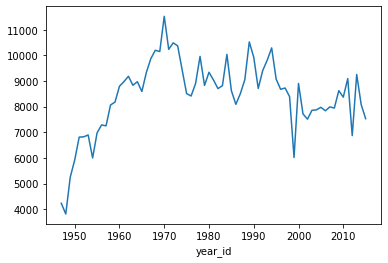

In [109]:
#visualise how many points the Knicks scored throughout the seasons
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

**11.1) Explain what the above line plot, showing how many points the Knicks scored throughout the seasons, reveals to you (i.e. describe what you find out).**

**Answer No.11.1**

The line plot suggests that Knicks reached a peak, spiking to more than 11,000 points around the year 1970 and then gradually
decreasig again and saw a steep depression just before the year 2000, where it dropped to a mere 6000 points.

<AxesSubplot:>

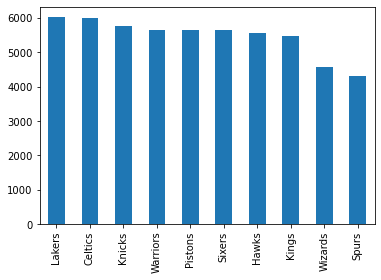

In [110]:
nba["fran_id"].value_counts().head(10).plot(kind="bar") #here we have created a bar plot which shows the games played by franchises

**11.2) Describe what the above bar plot reveals about the franchises with the most games played.**

**Answer No.11.2**

This bar plot suggests that the top three franchises playing the most number of games were Lakers, Celtics and Knicks.

**11.3) In 2013, the Miami Heat won the championship. Create a pie plot showing the count of their wins and losses during that season. (First, define a criterion to include only the Heat's games from 2013. Then, create a plot in the same way asyou have seen above).**

**Answer No.11.3**

In [111]:
nba[(nba["fran_id"] == "Heat") & (nba["year_id"] == 2013)]["game_result"].value_counts() #here we are filtering just the wins and losses out of the games played by Miami Heat in the year 2013

W    82
L    23
Name: game_result, dtype: int64

<AxesSubplot:ylabel='game_result'>

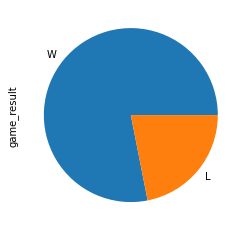

In [112]:
nba[(nba["fran_id"] == "Heat") & (nba["year_id"] == 2013)]["game_result"].value_counts().plot(kind="pie") #here we are visualizing the above results into a pie chart

** **

** **